In [ ]:
#ESTIMATION OF GOLD PRICE PROJECT CSE 422

pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.9/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/SA-LS/CSE422 - Project /gold_price_data.csv')

In [ ]:
ds.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
ds.tail()



,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
ds.shape

(2290, 6)

In [ ]:
#checking null values
ds.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
ds.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-16-c5f035154f52>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co_rel=ds.corr()


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-16-c5f035154f52>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

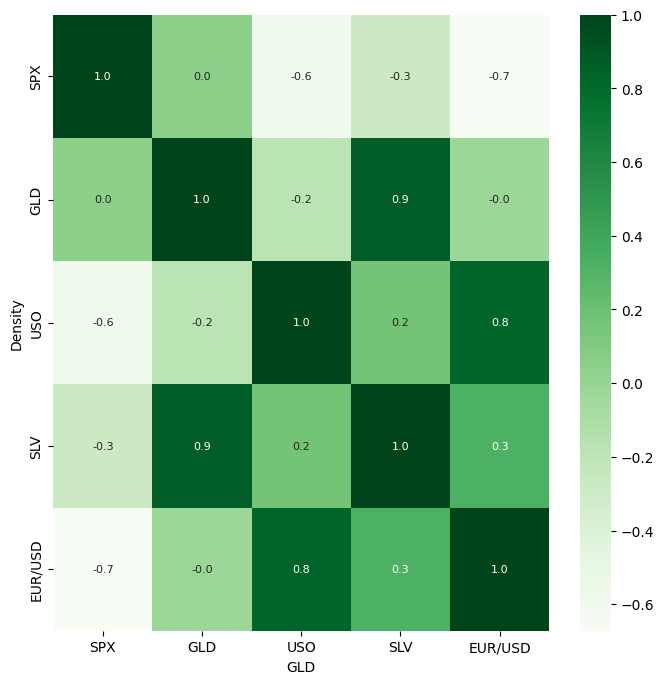

In [ ]:
"""# **Co-relation**"""

co_rel=ds.corr()
plt.figure(figsize = (8,8))
sns.heatmap(co_rel, cbar=True, fmt='.1f',annot=True, annot_kws={'size':8},  cmap='Greens')
print(co_rel['GLD'])

sns.distplot(ds['GLD'],color='green')

In [ ]:
#split the features and target
x=ds.drop(['Date','GLD'],axis=1)
y=ds['GLD']

In [ ]:
#printing feature values
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
#printing target values
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
"""# **Split Feature and Target Value**"""

#Splitting into Training data and Test Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1) #highest value of test size is 1 
#30% of the dataset should be reserved for testing, while the remaining 70% should be used for training.


In [ ]:
x_train

,SPX,USO,SLV,EUR/USD
1233,1661.319946,38.240002,22.150000,1.335399
59,1315.219971,84.370003,17.750000,1.576094
1654,2076.780029,18.930000,14.950000,1.108697
1719,2090.350098,14.690000,15.260000,1.103704
281,850.080017,27.330000,11.860000,1.300576
...,...,...,...,...
960,1354.579956,36.520000,28.379999,1.293661
905,1351.770020,38.689999,32.750000,1.323679
1096,1462.420044,33.820000,29.920000,1.319784
235,827.159973,26.910000,12.980000,1.291406


In [ ]:
x_test

,SPX,USO,SLV,EUR/USD
1971,2256.959961,11.620000,16.190001,1.054741
1163,1593.369995,33.459999,26.700001,1.311475
693,1327.219971,39.189999,33.110001,1.373438
1651,2057.639893,19.510000,15.030000,1.122297
508,1183.709961,39.369999,17.879999,1.321283
...,...,...,...,...
1921,2177.179932,10.530000,18.900000,1.121013
662,1285.959961,38.990002,29.000000,1.298398
1864,2079.060059,11.760000,16.580000,1.129102
1674,2083.560059,14.870000,13.990000,1.092705


In [ ]:
y_train



1233    131.690002
59       91.879997
1654    111.760002
1719    110.750000
281      86.889999
           ...    
960     154.470001
905     167.509995
1096    163.169998
235      90.209999
1061    167.990005
Name: GLD, Length: 1603, dtype: float64

In [ ]:
y_test

1971    110.820000
1163    151.050003
693     137.660004
1651    113.070000
508     114.629997
           ...    
1921    127.570000
662     135.460007
1864    122.639999
1674    104.389999
248      90.930000
Name: GLD, Length: 687, dtype: float64

In [ ]:
"""# **Decision Tree**"""

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt_acc1=print("The Training accuracy of the model is {:.2f}".format(dtr.score(x_train, y_train)))
dt_acc2=print("The Testing accuracy of the model is {:.2f}".format(dtr.score(x_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.97


In [ ]:
"""# **Linear Regressor**"""

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.predict(x_test)

lr_acc1=print("The Training accuracy of the model is {:.2f}".format(lr.score(x_train, y_train)))
lr_acc2=print("The Testing accuracy of the model is {:.2f}".format(lr.score(x_test, y_test)))

The Training accuracy of the model is 0.88
The Testing accuracy of the model is 0.88


In [ ]:
"""# **Random Forest**"""

#we will train our model using random forest regressor
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100)
reg.fit(x_train, y_train)

#let our model predict on test data
test_data_prediction = reg.predict(x_test)
print(test_data_prediction)

y_Pred = reg.predict(x_test)
y_Pred

rf_acc1=print("The Training accuracy of the model is {:.2f}".format(reg.score(x_train, y_train)))
rf_acc2=print("The Testing accuracy of the model is {:.2f}".format(reg.score(x_test, y_test)))

[113.4287001  148.28590044 140.83409855 112.53370166 114.04349993
  95.67119941 111.80009949  93.47789984 120.76060071 127.32949934
 147.89909993 120.34439907 119.28170006  88.26060092  96.02000024
  92.70089868 116.67440088  89.05829989 125.19080114 114.83510054
 118.22219968 152.88180245 122.69069802 120.15350063 171.23710069
 108.53809847 120.52010084  87.1798986   87.67020071  88.37239955
 121.60180051 154.59890217 143.74869801 125.76370082 126.04450014
  90.42379904 156.13879978 121.46440044 106.73290027 143.3894992
  92.50289965 127.6369006  117.6980008  152.97590076 119.26779965
  91.34510189  79.30530002 120.16660177 132.04739974 119.07849964
 127.3489008  165.92260066 153.46370158  92.6999994  148.75280057
 152.2634986  113.51850151 112.85360099  87.36089918 127.82369904
 124.92390092 151.48520327 114.71330005 110.70690015 161.24469733
 117.54079883 108.40080049 131.63459961 132.60340009 125.01500017
 117.26040028 149.78670224 156.15060153 168.45549537 109.51780059
 141.155797

In [ ]:
"""# **Data Scaling**"""

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

#We do not need this scaling for decision tree but for KNN and Logistic regration because distance matters in those algorithms
X_train_std = std.fit_transform(x_train)
X_test_std = std.transform(x_test)

X_train_std

X_test_std

array([[ 1.15773774, -1.02732261, -0.53282495, -1.73196487],
       [-0.11970903,  0.07057796,  0.945593  ,  0.21237772],
       [-0.6320623 ,  0.35862606,  1.84727322,  0.68164669],
       ...,
       [ 0.81527076, -1.02028478, -0.47796467, -1.16880121],
       [ 0.8239335 , -0.86394454, -0.84229412, -1.4444493 ],
       [-1.8379163 , -0.38084816, -1.01390876, -0.20466526]])

In [ ]:
"""# **KNN model**"""

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train_std, y_train)
y_knn = knn.predict(X_test_std)

y_knn

knn_acc1=print("Training accuracy is {:.2f}".format(knn.score(X_train_std, y_train)) )
knn_acc2=print("Testing accuracy is {:.2f} ".format(knn.score(X_test_std,y_test)) )

Training accuracy is 1.00
Testing accuracy is 0.99 


error  0.9853894361410475
[110.82, 151.050003, 137.660004, 113.07, 114.629997, 96.18, 110.459999, 95.120003, 121.25, 126.800003, 146.380005, 122.470001, 116.629997, 87.75, 95.989998, 92.730003, 115.690002, 89.18, 124.980003, 115.029999, 120.739998, 151.619995, 122.900002, 120.260002, 171.720001, 109.129997, 119.529999, 87.419998, 88.25, 90.610001, 121.309998, 154.190002, 151.440002, 128.229996, 126.720001, 90.800003, 167.320007, 120.959999, 105.900002, 143.809998, 92.290001, 127.589996, 116.75, 152.149994, 118.970001, 89.519997, 76.199997, 120.139999, 131.660004, 118.989998, 128.199997, 165.800003, 155.669998, 92.059998, 147.630005, 150.75, 114.290001, 111.540001, 87.379997, 127.959999, 124.769997, 151.619995, 113.639999, 110.879997, 161.539993, 119.779999, 107.519997, 129.869995, 131.679993, 125.980003, 115.480003, 150.410004, 155.360001, 168.710007, 110.739998, 141.630005, 102.269997, 113.75, 119.290001, 123.419998, 118.190002, 93.709999, 140.380005, 106.980003, 124.75, 92.059998, 13

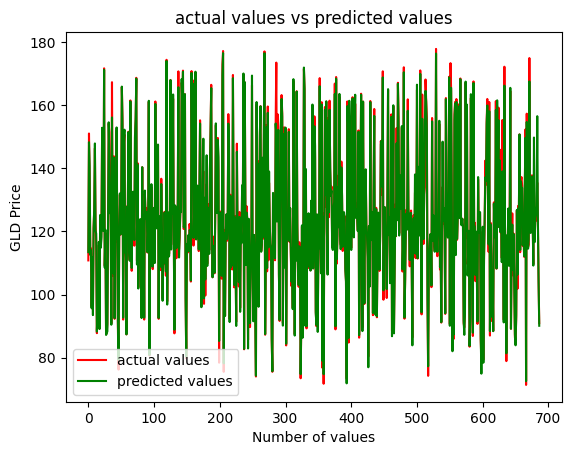

In [ ]:
"""# **Error Finding**"""

#now we will compare predicted values with our actual values
from sklearn import metrics
error = metrics.r2_score(y_test, test_data_prediction)
#error=error*100
print('error ',error)

#visulaization by plotting a graph
y_test = list(y_test)
print(y_test)
plt.plot(y_test, color='red', label = 'actual values')
plt.plot(test_data_prediction, color='green', label='predicted values')
plt.title('actual values vs predicted values')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()